In [1]:
## XGBoost 
# State 1 hot 
# Rurality Data
# SVI poverty index
# Minority?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import xgboost as xgb 
import shap
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import pairwise
from sklearn.model_selection import cross_val_score
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import re

In [2]:
main_path = Path.cwd()
data_path = main_path / 'Data'

#svi = pd.read_csv( data_path / 'Master Project Data' /'SVI Tract Data.csv',  )


In [3]:
# import stored methods 
path = Path.cwd()
main_path = Path.cwd()
data_path = main_path / 'Data'
from src.data import DataLoaders

ACS =  DataLoaders.ACSData(2016,'block_group')
ARC =  DataLoaders.ARCPData()

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [4]:
ACS = ACS.data
ACS

,inc_pct_poverty,race_pct_white,race_pct_whitenh,race_pct_nonwhite,race_pct_nonwhitenh,race_pct_black,race_pct_amind,race_pct_asian,race_pct_napi,race_pct_other,...,house_yr_pct_before_1960,house_yr_pct_after_2000,house_yr_pct_1960_2000,house_val_less_50K,house_val_50_100K,house_val_100K_300K,house_val_300K_500K,house_val_more_500K,race_pct_black_or_amind,pct_alt_heat
GEOID,,,,,,,,,,,,,,,,,,,,,
010010201001,0.191946,0.785235,0.763758,0.214765,0.236242,0.214765,0.000000,0.000000,0.000000,0.000000,...,0.221831,0.193662,0.584507,0.152047,0.274854,0.508772,0.064327,0.000000,0.214765,0.017606
010010201002,0.044269,0.856126,0.826877,0.143874,0.173123,0.082213,0.000000,0.007115,0.000000,0.000000,...,0.079229,0.085653,0.835118,0.100264,0.153034,0.538259,0.174142,0.034301,0.082213,0.032895
010010202001,0.382199,0.376042,0.376042,0.623958,0.623958,0.591667,0.000000,0.000000,0.013542,0.000000,...,0.135678,0.211055,0.653266,0.171053,0.337719,0.394737,0.065789,0.030702,0.591667,0.000000
010010202002,0.111426,0.497573,0.488673,0.502427,0.511327,0.461974,0.000000,0.019417,0.000000,0.008091,...,0.235772,0.075203,0.689024,0.053691,0.513423,0.412752,0.020134,0.000000,0.461974,0.019912
010010203001,0.042301,0.626481,0.626481,0.373519,0.373519,0.217851,0.009306,0.011421,0.002538,0.096447,...,0.030303,0.091887,0.877810,0.057522,0.349558,0.592920,0.000000,0.000000,0.227157,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,0.094029,0.950583,0.929307,0.049417,0.070693,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.308305,0.121729,0.569966,0.089320,0.114563,0.666019,0.091262,0.038835,0.000000,0.366569
560459511002,0.062579,0.935884,0.918642,0.064116,0.081358,0.009698,0.004849,0.044720,0.000000,0.000000,...,0.197500,0.337500,0.465000,0.123437,0.079687,0.525000,0.232812,0.039062,0.014547,0.825737
560459513001,0.261512,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.556757,0.000000,0.443243,0.229282,0.303867,0.466851,0.000000,0.000000,0.000000,0.105163


In [5]:
sa = ['10','11','12','13','24','37','45','52','56' ]
keep_index = [False]*len(ACS)
for s in sa:
    curr = ACS.index.str[:2] == s
    keep_index = keep_index + curr
print(np.count_nonzero(keep_index))
ACS = ACS[keep_index]
ACS

30906


,inc_pct_poverty,race_pct_white,race_pct_whitenh,race_pct_nonwhite,race_pct_nonwhitenh,race_pct_black,race_pct_amind,race_pct_asian,race_pct_napi,race_pct_other,...,house_yr_pct_before_1960,house_yr_pct_after_2000,house_yr_pct_1960_2000,house_val_less_50K,house_val_50_100K,house_val_100K_300K,house_val_300K_500K,house_val_more_500K,race_pct_black_or_amind,pct_alt_heat
GEOID,,,,,,,,,,,,,,,,,,,,,
100010401001,0.151611,0.905713,0.867936,0.094287,0.132064,0.068998,0.000000,0.000000,0.000000,0.000000,...,0.015748,0.241470,0.742782,0.021298,0.026369,0.787018,0.151116,0.014199,0.068998,0.565179
100010401002,0.057562,0.876411,0.857788,0.123589,0.142212,0.075056,0.005643,0.001129,0.002257,0.025959,...,0.101078,0.402965,0.495957,0.022059,0.007353,0.772059,0.191176,0.007353,0.080700,0.480349
100010401003,0.115561,0.862771,0.862771,0.137229,0.137229,0.088641,0.012475,0.022324,0.000000,0.006566,...,0.070064,0.199045,0.730892,0.188065,0.032550,0.558770,0.177215,0.043400,0.101116,0.708405
100010402011,0.118750,0.755443,0.701788,0.244557,0.298212,0.172240,0.005054,0.011664,0.000000,0.015163,...,0.205525,0.420994,0.373481,0.139368,0.037356,0.633621,0.189655,0.000000,0.177294,0.253641
100010402012,0.121654,0.660832,0.606379,0.339168,0.393621,0.245819,0.000000,0.023726,0.003501,0.000000,...,0.236333,0.237174,0.526493,0.046729,0.018692,0.856075,0.078505,0.000000,0.245819,0.079494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,0.094029,0.950583,0.929307,0.049417,0.070693,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.308305,0.121729,0.569966,0.089320,0.114563,0.666019,0.091262,0.038835,0.000000,0.366569
560459511002,0.062579,0.935884,0.918642,0.064116,0.081358,0.009698,0.004849,0.044720,0.000000,0.000000,...,0.197500,0.337500,0.465000,0.123437,0.079687,0.525000,0.232812,0.039062,0.014547,0.825737
560459513001,0.261512,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.556757,0.000000,0.443243,0.229282,0.303867,0.466851,0.000000,0.000000,0.000000,0.105163


In [24]:
len(ACS)

213144

In [19]:
566+438

1004

In [6]:
ARC = ARC.data
ARC

,geoid,census_block_group_y,census_block_group_x,city,state,zip,county,in_home_visit_date,smoke_alarms_installed__9_volt_10_year_dhh_,10_year_and_9_volt_alarms_installed,...,batteries_replaced,fire_escape_plans_made,fire_safety_checklists_completed,additional_hazard_education_conducted,additional_hazard_type,people_served,youth_served,seniors_served,veterans_military_members_and_military_family_members_served,individuals_with_disabilities_access_or_functional_needs_served
12,010010205002,32.470418,-86.424166,PRATTVILLE,AL,36066,Autauga,9/9/2016,1,1,...,0,1,1,0,None,2,0,0,0,0
18,010010208012,32.455173,-86.534590,PRATTVILLE,AL,36067,Autauga,9/30/2019,2,2,...,0,1,1,1,Tornadoes,5,0,0,1,0
23,010010208021,32.524822,-86.573009,PRATTVILLE,AL,36067,Autauga,5/4/2019,3,2,...,0,1,1,1,Other,1,0,0,0,0
24,010010208021,32.524822,-86.573009,PRATTVILLE,AL,36067,Autauga,9/27/2019,1,1,...,0,1,1,1,Tornadoes,1,0,0,0,0
27,010010208023,32.543983,-86.492100,PRATTVILLE,AL,36067,Autauga,12/2/2017,3,3,...,0,1,1,0,None,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862041,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,2,2,...,0,1,1,1,Wildfires,1,0,0,0,0
862042,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,3,3,...,0,1,1,1,Wildfires,4,2,0,0,0
862043,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,3,3,...,0,1,1,1,Wildfires,2,0,1,0,1
862044,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,4,4,...,0,1,1,1,Wildfires,3,0,0,0,0


In [7]:
sa = ['10','11','12','13','24','37','45','52','56' ]

keep_index = [False]*len(ARC)
for s in sa:
    curr = ARC['geoid'].astype(str).str[:2] == s
    keep_index = keep_index + curr
print(np.count_nonzero(keep_index))
ARC = ARC[keep_index]
ARC

87149


,geoid,census_block_group_y,census_block_group_x,city,state,zip,county,in_home_visit_date,smoke_alarms_installed__9_volt_10_year_dhh_,10_year_and_9_volt_alarms_installed,...,batteries_replaced,fire_escape_plans_made,fire_safety_checklists_completed,additional_hazard_education_conducted,additional_hazard_type,people_served,youth_served,seniors_served,veterans_military_members_and_military_family_members_served,individuals_with_disabilities_access_or_functional_needs_served
127501,100010402011,39.289342,-75.652212,CLAYTON,DE,19938,Kent,5/12/2018,3,3,...,0,1,1,0,None,3,0,0,0,0
127502,100010402011,39.289342,-75.652212,CLAYTON,DE,19938,Kent,5/12/2018,3,3,...,0,1,1,0,None,6,2,1,1,2
127503,100010402011,39.289342,-75.652212,CLAYTON,DE,19938,Kent,5/12/2018,3,3,...,0,1,1,0,None,2,0,0,0,2
127504,100010402011,39.289342,-75.652212,CLAYTON,DE,19938,Kent,5/12/2018,3,3,...,0,1,1,1,Other,5,2,2,0,0
127505,100010402011,39.289342,-75.652212,CLAYTON,DE,19938,Kent,5/12/2018,3,3,...,0,1,1,1,Other,2,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862041,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,2,2,...,0,1,1,1,Wildfires,1,0,0,0,0
862042,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,3,3,...,0,1,1,1,Wildfires,4,2,0,0,0
862043,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,3,3,...,0,1,1,1,Wildfires,2,0,1,0,1
862044,560459513003,43.843551,-104.260073,NEWCASTLE,WY,82701,Weston,3/4/2017,4,4,...,0,1,1,1,Wildfires,3,0,0,0,0


In [7]:
# import stored methods 
#path = Path.cwd().parent.parent

#LoadAndCleanARCP = main_path /'src' /'data'/ 'LoadAndCleanARCP.py'
#LoadAndCleanACS = main_path /'src' /'data'/ 'LoadAndCleanACS.py'
# Run methods to obtain clean datasets 

#%run $LoadAndCleanARCP
#%run $LoadAndCleanACS

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


                     Pair Var 1                    Pair Var 2  Corr Value
168            denom_house_room                denom_house_yr         1.0
191              denom_house_yr                   denom_kitch         1.0
170            denom_house_room                   denom_plumb         1.0
226                 denom_plumb                   denom_kitch         1.0
171            denom_house_room                   denom_kitch         1.0
..                          ...                           ...         ...
118           worked_past_12_mo       did_not_work_past_12_mo        -1.0
11             race_pct_whitenh           race_pct_nonwhitenh        -1.0
4                race_pct_white             race_pct_nonwhite        -1.0
156     house_pct_ownd_occupied       house_pct_rent_occupied        -1.0
244  house_pct_complete_kitchen  house_pct_incomplete_kitchen        -1.0

[102 rows x 3 columns]
              inc_pct_poverty  race_pct_white  race_pct_whitenh  \
GEOID                

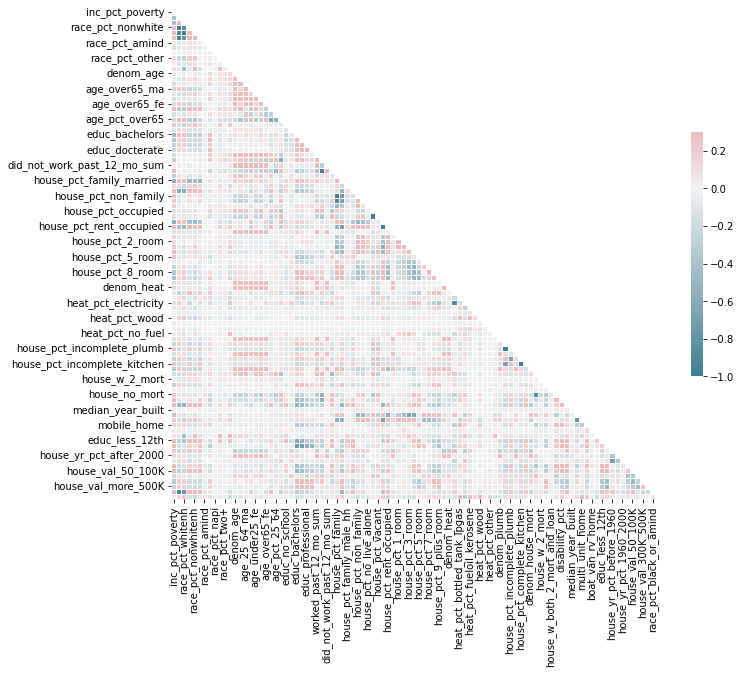

In [8]:
#Find correlated features in ACS dataset and identify the highly correlated relationships

# Create ACS correlation matrix
corr = ACS.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
 
# Filtering out lower/upper triangular duplicates 
corr_high = corr[abs(corr) > 0.7].stack().reset_index()
corr_high = corr_high[corr_high['level_0'].astype(str)!=corr_high['level_1'].astype(str)]
corr_high['ordered-cols'] = corr_high.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
corr_high = corr_high.drop_duplicates(['ordered-cols'])
corr_high.drop(['ordered-cols'], axis=1, inplace=True)
corr_high.columns = ['Pair Var 1', 'Pair Var 2', 'Corr Value']

# Display highly correlated pairs
print(corr_high.sort_values(by=['Corr Value'], ascending=False))




#From highly correlated pairs, remove one of the Pair Vars from the ACS dataset except for the 'mort' variables
#ACS = ACS.drop(['house_pct_vacant', 'did_not_work_past_12_mo', 'house_pct_non_family', 'house_pct_rent_occupied',
#                           'race_pct_white', 'race_pct_nonwhitenh','race_pct_hisp', 'house_pct_incomplete_plumb',
#                           'house_pct_incomplete_kitchen', 'race_pct_whitenh','house_no_mort',
#                           'race_pct_black','house_pct_live_alone','house_pct_family_married','educ_bachelors',
#                           'heat_pct_electricity','house_pct_complete_kitchen','house_yr_pct_1960_2000'], axis=1) 





print (ACS.head())


In [9]:
# Based on feature importance experiments, select features with consistence importance across annual predictions
ACS_reduced = ACS[['heat_pct_coal','heat_pct_solar','house_yr_pct_before_1960','educ_less_12th','heat_pct_wood',
                  'inc_pct_poverty','age_pct_over65','race_pct_nonwhite','house_val_100K_300K','educ_no_school',
                  'house_pct_ownd_occupied','heat_pct_utility_gas','house_w_home_equity_loan','house_val_less_50K',
                  'educ_high_school','house_pct_family','heat_pct_other','house_pct_family_female_hh']]



In [10]:
ACS_cols_to_use =[ 'did_not_work_past_12_mo',
               'house_pct_live_alone',
               'pct_alt_heat',
               'house_yr_pct_before_1960',
               'inc_pct_poverty',
               'race_pct_black_or_amind']
ACS_commonCols = ACS[ACS_cols_to_use]
ACS_justSmoke_Cols = [ 'did_not_work_past_12_mo',
               'house_pct_live_alone',
               'pct_alt_heat',
               'house_yr_pct_before_1960',
               'inc_pct_poverty',
               'race_pct_black_or_amind',
                'age_pct_over65',
                'house_val_less_50K']
ACS_justSmokeCols = ACS[ACS_justSmoke_Cols]

In [11]:
# smoke detector statistical model munging
#sm = pd.read_csv(  data_path /'Model Outputs'/'SmokeAlarmModelOutput.csv')
sm = pd.read_csv(  data_path /'Model Outputs'/'SmokeAlarmModelMultiLevel.csv')
print(np.unique(sm.geography))
sm


['block_group' 'county' 'state' 'tract']


,geoid,num_surveys,detectors_found_total,detectors_found_prc,detectors_found_CI,detectors_working_total,detectors_working_prc,detectors_working_CI,geography
0,#_010139534001,39,18.0,46.15,15.645969,12.0,30.77,14.485540,block_group
1,#_010139534002,48,19.0,39.58,13.834508,8.0,16.67,10.543965,block_group
2,#_010730023034,44,34.0,77.27,12.383258,19.0,43.18,14.635975,block_group
3,#_010730035002,32,18.0,56.25,17.188239,8.0,25.00,15.003125,block_group
4,#_010730035003,34,23.0,67.65,15.724891,11.0,32.35,15.724891,block_group
...,...,...,...,...,...,...,...,...,...
213734,#_560459511001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state
213735,#_560459511002,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state
213736,#_560459513001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state
213737,#_560459513002,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state


In [12]:
sm['geoid'] = sm['geoid'].str[2:]
sm['tract'] = sm['geoid'].str[:-1]
sm.set_index('geoid', inplace =  True)

sa = ['10','11','12','13','24','37','45','52','56' ]
keep_index = [False]*len(sm)
for s in sa:
    curr = sm.index.str[:2] == s
    keep_index = keep_index + curr
print(np.count_nonzero(keep_index))
sm = sm[keep_index]
sm

sm_all = sm.copy()
#sm_all = sm[ sm['geography'].isin(['county','state']) ]

sm = sm[ sm['geography'].isin(['tract','block_group']) ]

sm_all

30946


,num_surveys,detectors_found_total,detectors_found_prc,detectors_found_CI,detectors_working_total,detectors_working_prc,detectors_working_CI,geography,tract
geoid,,,,,,,,,
100010418011,33,27.0,81.82,13.159088,16.0,48.48,17.051726,block_group,10001041801
100010419001,31,28.0,90.32,10.408901,3.0,9.68,10.408901,block_group,10001041900
100010422022,33,23.0,69.70,15.679666,15.0,45.45,16.988828,block_group,10001042202
100030005002,32,26.0,81.25,13.523634,21.0,65.62,16.457055,block_group,10003000500
100030024004,62,52.0,83.87,9.155472,36.0,58.06,12.283241,block_group,10003002400
...,...,...,...,...,...,...,...,...,...
560459511001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state,56045951100
560459511002,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state,56045951100
560459513001,892,562.0,63.00,3.168435,347.0,38.90,3.199404,state,56045951300


In [13]:
sm

,num_surveys,detectors_found_total,detectors_found_prc,detectors_found_CI,detectors_working_total,detectors_working_prc,detectors_working_CI,geography,tract
geoid,,,,,,,,,
100010418011,33,27.0,81.82,13.159088,16.0,48.48,17.051726,block_group,10001041801
100010419001,31,28.0,90.32,10.408901,3.0,9.68,10.408901,block_group,10001041900
100010422022,33,23.0,69.70,15.679666,15.0,45.45,16.988828,block_group,10001042202
100030005002,32,26.0,81.25,13.523634,21.0,65.62,16.457055,block_group,10003000500
100030024004,62,52.0,83.87,9.155472,36.0,58.06,12.283241,block_group,10003002400
...,...,...,...,...,...,...,...,...,...
560210004012,56,26.0,46.43,13.062377,16.0,28.57,11.831982,tract,56021000401
560210004013,56,26.0,46.43,13.062377,16.0,28.57,11.831982,tract,56021000401
560210004014,56,26.0,46.43,13.062377,16.0,28.57,11.831982,tract,56021000401


In [14]:
def create_rurality_data(sm,subset_county = False): 
    #Rurality Data Munging 
    rd = pd.read_csv( data_path / 'Master Project Data' /'Tract Rurality Data.csv', dtype = {'Tract':'object'},encoding = 'latin-1' )
    rd['Population Density (per square mile), 2010'] =  rd['Population Density (per square mile), 2010'].str.replace(',','').astype('float')
    rd = rd.iloc[:,[0,2,4,6,8]]
    block_tract = sm['tract'].to_frame()
    block_tract = block_tract.reset_index()
    rd = block_tract.merge(rd, how = 'left', left_on = 'tract' , right_on ='Tract')
    rd.set_index('geoid',inplace= True)
    rd = rd.iloc[:,2:]
    rd['Select State'] = rd['Select State'].astype('category')

    # add state level model estimates 
    sms = pd.rd = pd.read_csv( data_path /'Model Outputs'/'Smoke_Alarm_Single_Level'/ 'SmokeAlarmModelState.csv')
    sms['geoid'] = sms['geoid'].str[2:]
    sms =  sms.loc[:,['geoid','detectors_found_prc']]
    sms = sms.rename(columns= {'geoid':'state_geoid'}  )

    rd['state_geoid'] = rd.index.str[:2]
    rd = rd.reset_index()
    rd = rd.merge(sms,how = 'left', on = 'state_geoid' )
    rd.drop('state_geoid',axis = 1,inplace = True)
    rd = rd.rename(columns = {'detectors_found_prc':'state_detectors_found_prc'}) 
    rd = rd.set_index('geoid')


    # add county level estimates
    smc = pd.read_csv( data_path /'Model Outputs'/'Smoke_Alarm_Single_Level'/ 'SmokeAlarmModelCounty.csv')
    smc['geoid'] = smc['geoid'].str[2:]
    if subset_county:
        smc.iloc[0::2,:] = np.nan
    smc =  smc.loc[:,['geoid','detectors_found_prc']]
    smc = smc.rename(columns= {'geoid':'county_geoid'}  )

    rd['county_geoid'] = rd.index.str[:5]
    rd = rd.reset_index()
    rd = rd.merge(smc,how = 'left', on = 'county_geoid' )
    rd.drop('county_geoid',axis = 1,inplace = True)
    rd = rd.rename(columns = {'detectors_found_prc':'county_detectors_found_prc'}) 
    rd = rd.set_index('geoid')
  #  rd['RUCA_rurality_index'] = rd['Primary RUCA Code 2010']
  #  rd[rd['RUCA_rurality_index'] > 10 ] = np.NaN
    rd = rd.iloc[:,3:]

    return rd 

# alternative 1 hot based encoding
#rd = rd.merge( pd.get_dummies(rd['Select State']), how = 'left', on= 'geoid')


In [15]:
rd = create_rurality_data(sm,True)
rd_all = create_rurality_data(sm_all)

In [16]:
rd

,"Population Density (per square mile), 2010",state_detectors_found_prc,county_detectors_found_prc
geoid,,,
100010418011,NaN,77.81,NaN
100010419001,NaN,77.81,NaN
100010422022,NaN,77.81,NaN
100030005002,NaN,77.81,77.01
100030024004,NaN,77.81,77.01
...,...,...,...
560210004012,NaN,63.00,55.44
560210004013,NaN,63.00,55.44
560210004014,NaN,63.00,55.44


In [17]:
def train_model(X = rd, ACS = pd.DataFrame(), y= sm, predict ='Presence', modeltype='XGBoost'):
    from scipy.stats import zscore, pearsonr
    from sklearn.metrics import auc, accuracy_score, confusion_matrix,mean_squared_error,mean_absolute_error,roc_auc_score, r2_score

    assert(predict in ['Presence', 'Working']) 
   
    
    # Define model types & parameters 
    
    if modeltype =='LinearRegression':
        from sklearn.linear_model import LinearRegression
        model = LinearRegression()
    if modeltype =='ElasticNet':    
        from sklearn.linear_model import ElasticNet
        model = ElasticNet()
    if modeltype =='Ridge':    
        from sklearn.linear_model import Ridge
        model = Ridge()
    if modeltype =='Lasso':    
        from sklearn.linear_model import Lasso
        model = Lasso()       
        
       
        
    elif modeltype =='XGBoost':
        model = xgb.XGBRegressor(objective = 'reg:squarederror',random_state = 0)
            
  
    if  predict == 'Presence':
        y = y['detectors_found_prc']
    elif predict =='Working':
        y = y['detectors_working_prc']


    # merge in ACS Data into X unless NFIRS-Only model
    if not ACS.empty:
        X = X.merge(ACS, how ='left',left_index = True, right_index = True)
        print(X.size)
        print(y.size)
        #X = X[X.index.isin(y.index)]
        #y = y[y.index.isin(X.index)]
        print(X.size)
        print(y.size)
        y = y.filter(X.index)
    
    # Create 80/20 training/testing set split
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2 )

    # Perform cross-validation 

    #scaler = preprocessing.StandardScaler().fit(X)
    #scaler.transform(X)
    #print ('Cross Val Score:')
    #print(cross_val_score(model, X, y))

    # Standardize features by removing the mean and scaling to unit variance
    
    #scaler = preprocessing.StandardScaler().fit(X_train)
    #X_columns = X_train.columns
    #X_train =  pd.DataFrame(scaler.transform(X_train), columns = X_columns )
    #X_test  =  pd.DataFrame(scaler.transform(X_test) , columns = X_columns )

    # Fit model to training set

    model = model.fit(X_train,y_train)

    # Calculate training set performance
    train_predictions = model.predict(X_train)
    print('-----Training_Performance------')
    print(mean_squared_error(y_train, train_predictions))
    print ('Test RMSE: {}'.format(mean_squared_error(y_train, train_predictions, squared = False)) )
    print ('Test MAE: {}'.format(mean_absolute_error(y_train, train_predictions)) )
    sns.scatterplot(y_train,train_predictions) 
    plt.show()
    
    # Calculate test set performance
    test_predictions = model.predict(X_test)
    print ('-----Test Performance ----- ')
    print ('Test RMSE: {}'.format(mean_squared_error(y_test, test_predictions, squared = False)) )
    print ('Test MAE: {}'.format(mean_absolute_error(y_test, test_predictions)) )
    sns.scatterplot(y_test,test_predictions) 
    plt.show()
    print ('Test Correlation: {}'.format(pearsonr(y_test, test_predictions)) )
    print ('Test R-squared: {}'.format(r2_score(y_test, test_predictions)) )


    #Calculate feature importance for each model
    if modeltype == 'XGBoost':
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        print("\n Feature ranking:")
        for f in range(len(X_test.columns)):
            print("%d. %s (%f)" % (f + 1, X_test.columns[indices[f]], importances[indices[f]])) 


    return  model,X_test,y_test



In [18]:
def train_model_justACS(ACS = pd.DataFrame(), y= sm, predict ='Presence', modeltype='XGBoost'):
    from scipy.stats import zscore, pearsonr
    from sklearn.metrics import auc, accuracy_score, confusion_matrix,mean_squared_error,mean_absolute_error,roc_auc_score, r2_score

    assert(predict in ['Presence', 'Working']) 
   
    
    # Define model types & parameters 
    
    if modeltype =='LinearRegression':
        from sklearn.linear_model import LinearRegression
        model = LinearRegression()
    if modeltype =='ElasticNet':    
        from sklearn.linear_model import ElasticNet
        model = ElasticNet()
    if modeltype =='Ridge':    
        from sklearn.linear_model import Ridge
        model = Ridge()
    if modeltype =='Lasso':    
        from sklearn.linear_model import Lasso
        model = Lasso()       
        
       
        
    elif modeltype =='XGBoost':
        model = xgb.XGBRegressor(objective = 'reg:squarederror',random_state = 0)
            
  
    if  predict == 'Presence':
        y = y['detectors_found_prc']
    elif predict =='Working':
        y = y['detectors_working_prc']


    # merge in ACS Data into X unless NFIRS-Only model
    if not ACS.empty:
        X = ACS
        print(X.size)
        print(y.size)
        X = X[X.index.isin(y.index)]
        y = y[y.index.isin(X.index)]
        print(X.size)
        print(y.size)
        y = y.filter(X.index)
    
    # Create 80/20 training/testing set split
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2 )

    # Perform cross-validation 

    #scaler = preprocessing.StandardScaler().fit(X)
    #scaler.transform(X)
    #print ('Cross Val Score:')
    #print(cross_val_score(model, X, y))

    # Standardize features by removing the mean and scaling to unit variance
    
    #scaler = preprocessing.StandardScaler().fit(X_train)
    #X_columns = X_train.columns
    #X_train =  pd.DataFrame(scaler.transform(X_train), columns = X_columns )
    #X_test  =  pd.DataFrame(scaler.transform(X_test) , columns = X_columns )

    # Fit model to training set

    model = model.fit(X_train,y_train)

    # Calculate training set performance
    train_predictions = model.predict(X_train)
    print('-----Training_Performance------')
    print(mean_squared_error(y_train, train_predictions))
    print ('Test RMSE: {}'.format(mean_squared_error(y_train, train_predictions, squared = False)) )
    print ('Test MAE: {}'.format(mean_absolute_error(y_train, train_predictions)) )
    sns.scatterplot(y_train,train_predictions) 
    plt.show()
    
    # Calculate test set performance
    test_predictions = model.predict(X_test)
    print ('-----Test Performance ----- ')
    print ('Test RMSE: {}'.format(mean_squared_error(y_test, test_predictions, squared = False)) )
    print ('Test MAE: {}'.format(mean_absolute_error(y_test, test_predictions)) )
    sns.scatterplot(y_test,test_predictions) 
    plt.show()
    print ('Test Correlation: {}'.format(pearsonr(y_test, test_predictions)) )
    print ('Test R-squared: {}'.format(r2_score(y_test, test_predictions)) )


    #Calculate feature importance for each model
    if modeltype == 'XGBoost':
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        print("\n Feature ranking:")
        for f in range(len(X_test.columns)):
            print("%d. %s (%f)" % (f + 1, X_test.columns[indices[f]], importances[indices[f]])) 


    return  model,X_test,y_test



247797
2503
247797
2503
-----Training_Performance------
0.7110947196884865
Test RMSE: 0.8432643237375138
Test MAE: 0.5853204374179081


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


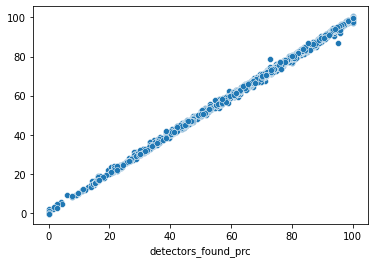

-----Test Performance ----- 
Test RMSE: 18.80955489864487
Test MAE: 14.084807965170123


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


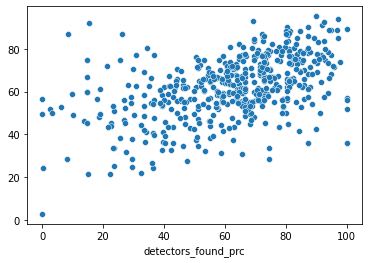

Test Correlation: (0.5012318639108231, 3.158875818141816e-33)
Test R-squared: 0.21773772717809903

 Feature ranking:
1. county_detectors_found_prc (0.062292)
2. house_yr_pct_before_1960 (0.033417)
3. spanish_speaking (0.030698)
4. disability_pct (0.024912)
5. median_year_built (0.023709)
6. denom_house_mort (0.022139)
7. heat_pct_fueloil_kerosene (0.020884)
8. house_yr_pct_1960_2000 (0.019672)
9. house_pct_ownd_occupied (0.019279)
10. snap_past_12_mo (0.019006)
11. house_val_more_500K (0.017759)
12. heat_pct_electricity (0.017748)
13. race_pct_black_or_amind (0.017636)
14. educ_masters (0.017625)
15. race_pct_napi (0.016373)
16. house_val_100K_300K (0.015759)
17. house_val_300K_500K (0.015210)
18. age_pct_over65 (0.015004)
19. state_detectors_found_prc (0.014801)
20. house_pct_2_room (0.014646)
21. race_pct_asian (0.014519)
22. race_pct_black (0.014438)
23. pct_alt_heat (0.013882)
24. single_unit_home (0.013721)
25. race_pct_hisp (0.013619)
26. house_pct_live_alone (0.013248)
27. boat_

In [19]:
mdl,X_test,y_test = train_model(X = rd, ACS = ACS, y = sm   ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


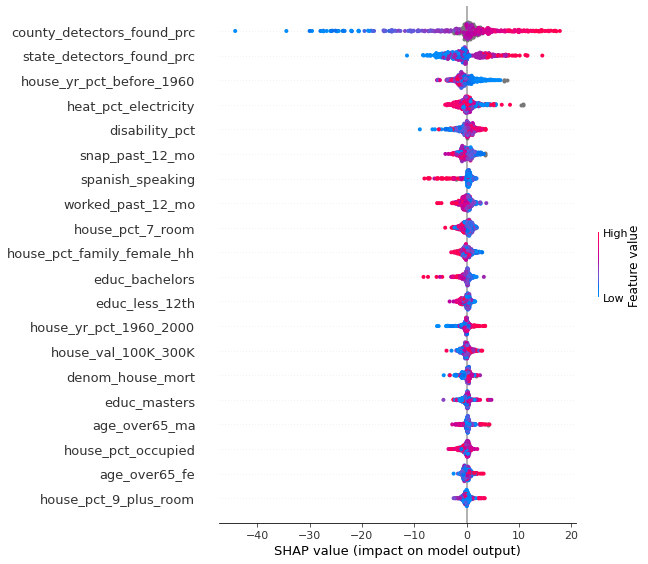

In [20]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

2966976
2503
239616
2496
-----Training_Performance------
0.9877813792281132
Test RMSE: 0.9938719128882318
Test MAE: 0.7087423335108347


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


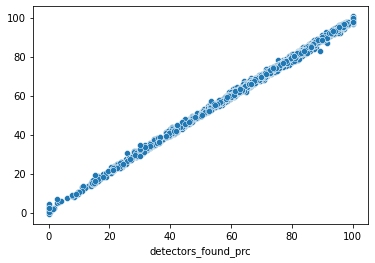

-----Test Performance ----- 
Test RMSE: 20.396942640572252
Test MAE: 16.00041043395996


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


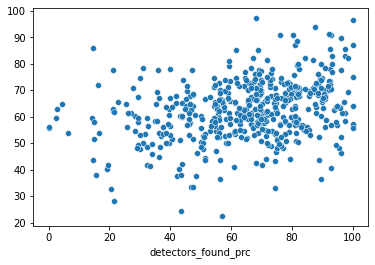

Test Correlation: (0.3194108627779801, 2.537603715638631e-13)
Test R-squared: 0.04384077441331269

 Feature ranking:
1. heat_pct_wood (0.025152)
2. house_yr_pct_1960_2000 (0.024818)
3. educ_less_12th (0.024267)
4. educ_docterate (0.020670)
5. race_pct_black_or_amind (0.020378)
6. heat_pct_electricity (0.020165)
7. spanish_speaking (0.019302)
8. age_over65_ma (0.019291)
9. house_pct_family_female_hh (0.019248)
10. house_val_100K_300K (0.018653)
11. heat_pct_no_fuel (0.017924)
12. house_pct_complete_kitchen (0.017411)
13. denom_house_mort (0.017371)
14. heat_pct_bottled_tank_lpgas (0.016872)
15. heat_pct_fueloil_kerosene (0.016630)
16. house_pct_no_live_alone (0.016436)
17. house_val_more_500K (0.016303)
18. heat_pct_utility_gas (0.015336)
19. race_pct_hisp (0.015281)
20. snap_past_12_mo (0.015273)
21. single_unit_home (0.015029)
22. heat_pct_solar (0.014974)
23. worked_past_12_mo (0.014496)
24. house_pct_1_room (0.014295)
25. worked_past_12_mo_sum (0.014094)
26. house_pct_2_room (0.0137

In [21]:
mdl_justACS,X_test,y_test = train_model_justACS(ACS = ACS, y = sm   ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


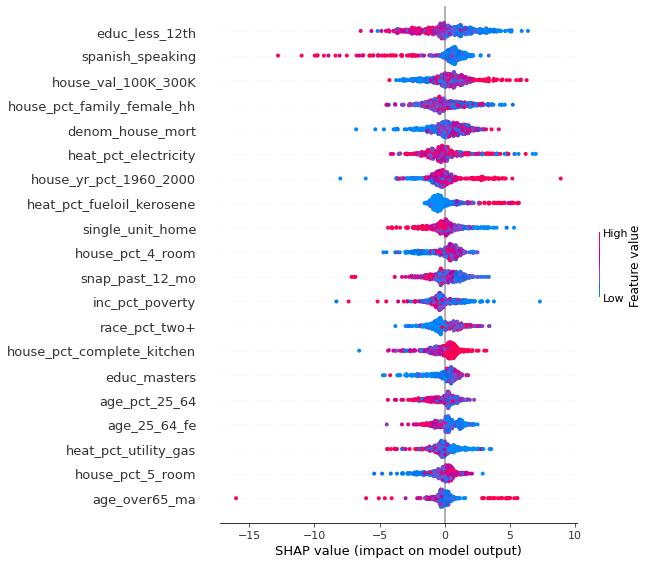

In [22]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl_justACS).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

52563
2503
52563
2503
-----Training_Performance------
8.012948003039497
Test RMSE: 2.8307151045344527
Test MAE: 1.7315929825227339


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


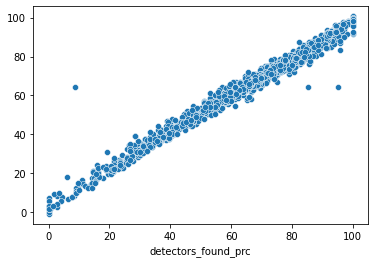

-----Test Performance ----- 
Test RMSE: 19.493430343151793
Test MAE: 14.710003925026534


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


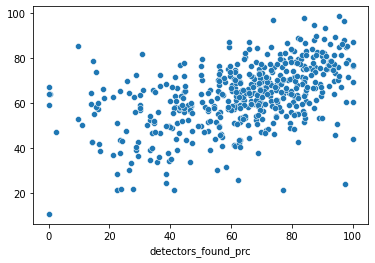

Test Correlation: (0.4922159981785106, 6.248378534058715e-32)
Test R-squared: 0.21982151880831158

 Feature ranking:
1. county_detectors_found_prc (0.178466)
2. house_val_less_50K (0.055589)
3. state_detectors_found_prc (0.055367)
4. race_pct_nonwhite (0.054010)
5. house_pct_family (0.053272)
6. house_pct_ownd_occupied (0.052725)
7. house_yr_pct_before_1960 (0.051484)
8. house_val_100K_300K (0.051455)
9. educ_high_school (0.047473)
10. house_pct_family_female_hh (0.045282)
11. age_pct_over65 (0.044371)
12. educ_no_school (0.043710)
13. heat_pct_other (0.041420)
14. heat_pct_utility_gas (0.039643)
15. educ_less_12th (0.038693)
16. heat_pct_wood (0.036548)
17. heat_pct_solar (0.035792)
18. house_w_home_equity_loan (0.033105)
19. inc_pct_poverty (0.029843)
20. heat_pct_coal (0.011752)
21. Population Density (per square mile), 2010 (0.000000)


In [23]:
mdl2,X_test,y_test =train_model(X = rd, y = sm , ACS = ACS_reduced  ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


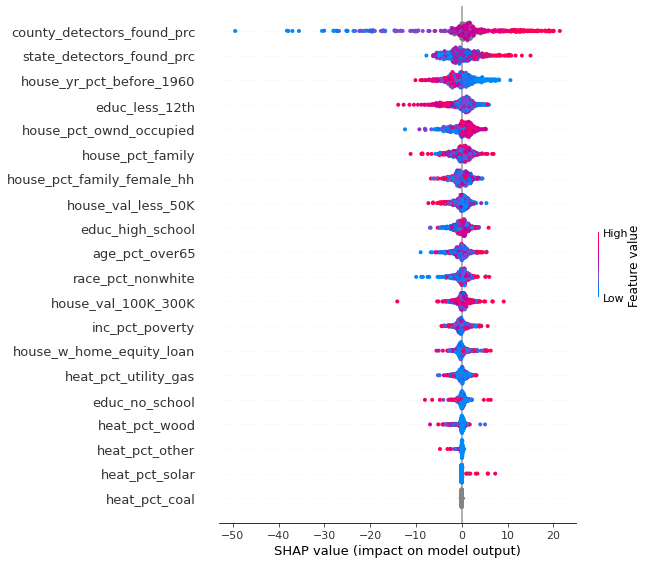

In [24]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl2).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

556308
2503
44928
2496
-----Training_Performance------
9.790036914147086
Test RMSE: 3.1289034683331294
Test MAE: 2.2142915052348724


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


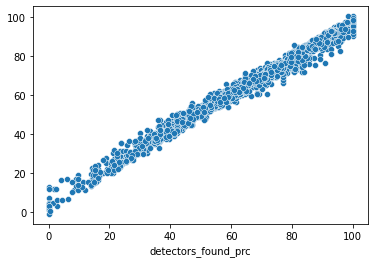

-----Test Performance ----- 
Test RMSE: 21.479898962733124
Test MAE: 16.942836336746215


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


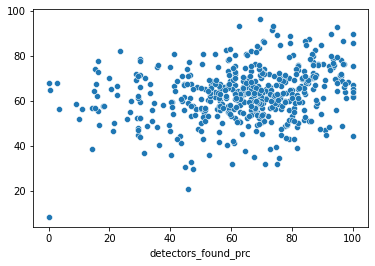

Test Correlation: (0.2367874499700814, 8.421486719220928e-08)
Test R-squared: -0.05831858916095767

 Feature ranking:
1. heat_pct_wood (0.084413)
2. race_pct_nonwhite (0.072611)
3. house_val_100K_300K (0.072082)
4. house_val_less_50K (0.070914)
5. heat_pct_other (0.070678)
6. house_pct_family (0.067003)
7. heat_pct_utility_gas (0.062283)
8. house_pct_ownd_occupied (0.060750)
9. house_pct_family_female_hh (0.060476)
10. educ_less_12th (0.056627)
11. house_w_home_equity_loan (0.055131)
12. age_pct_over65 (0.054839)
13. inc_pct_poverty (0.051972)
14. educ_high_school (0.050941)
15. educ_no_school (0.043162)
16. house_yr_pct_before_1960 (0.035709)
17. heat_pct_solar (0.018327)
18. heat_pct_coal (0.012081)


In [25]:
mdl2_justACS,X_test,y_test =train_model_justACS(ACS = ACS_reduced, y = sm   ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


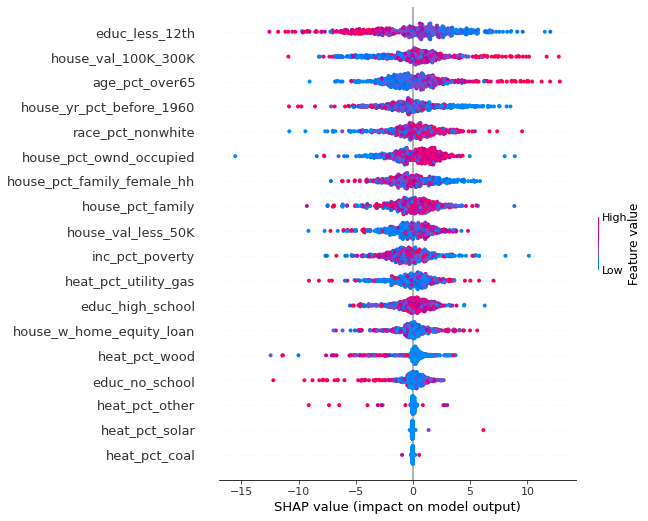

In [26]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl2_justACS).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

-----Training_Performance------
312.9563878516192
Test RMSE: 17.690573417829597
Test MAE: 13.075547415021319


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


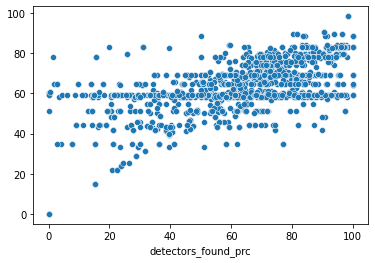

-----Test Performance ----- 
Test RMSE: 17.816400905825887
Test MAE: 13.497739875397075


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


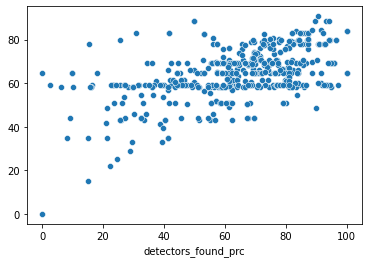

Test Correlation: (0.5292643422101959, 1.6333699335622287e-37)
Test R-squared: 0.27925782998061943

 Feature ranking:
1. county_detectors_found_prc (0.665321)
2. state_detectors_found_prc (0.334679)
3. Population Density (per square mile), 2010 (0.000000)


In [27]:
mdl3,X_test,y_test=train_model(X = rd, y = sm ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
All-NaN slice encountered


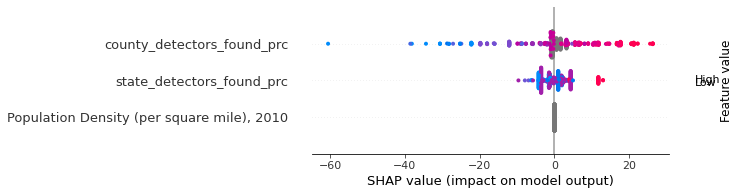

In [28]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl3).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

22527
2503
22527
2503
-----Training_Performance------
19.046615070439525
Test RMSE: 4.364242783168637
Test MAE: 2.9128453387980997


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


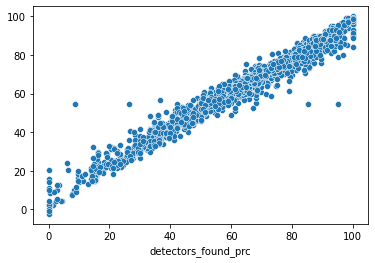

-----Test Performance ----- 
Test RMSE: 18.021155739168062
Test MAE: 13.962252213122126


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


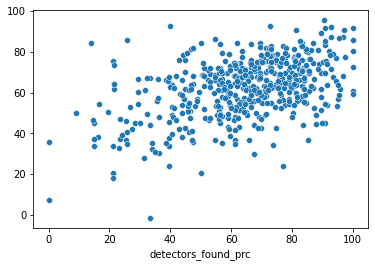

Test Correlation: (0.47390846890615207, 2.0522243925439178e-29)
Test R-squared: 0.14526484938528517

 Feature ranking:
1. county_detectors_found_prc (0.308544)
2. house_yr_pct_before_1960 (0.119591)
3. race_pct_black_or_amind (0.111627)
4. inc_pct_poverty (0.104058)
5. state_detectors_found_prc (0.100224)
6. house_pct_live_alone (0.094244)
7. did_not_work_past_12_mo (0.082693)
8. pct_alt_heat (0.079020)
9. Population Density (per square mile), 2010 (0.000000)


In [29]:
mdl4,X_test,y_test =train_model(X = rd, y = sm , ACS = ACS_commonCols  ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
All-NaN slice encountered


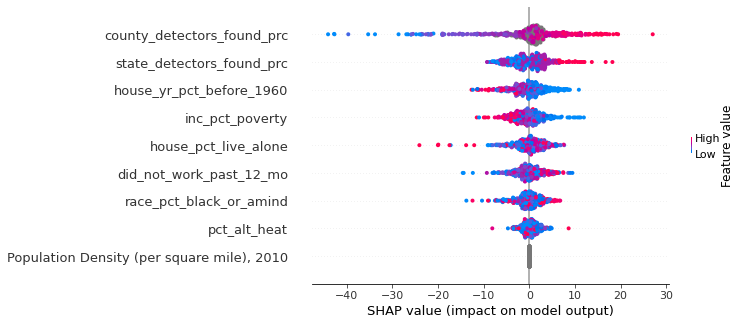

In [30]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl4).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

185436
2503
14976
2496
-----Training_Performance------
30.585315282156387
Test RMSE: 5.530399197359661
Test MAE: 3.994380351993627


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


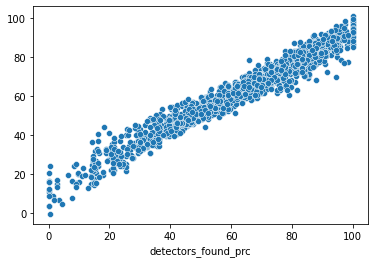

-----Test Performance ----- 
Test RMSE: 22.86094399068665
Test MAE: 17.882819583282473


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


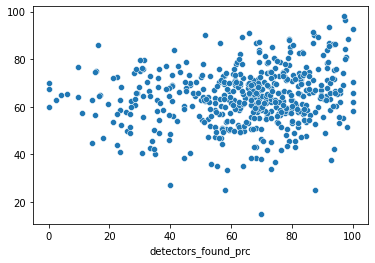

Test Correlation: (0.14796003595588716, 0.0009050592744281835)
Test R-squared: -0.15358987761719312

 Feature ranking:
1. inc_pct_poverty (0.197501)
2. race_pct_black_or_amind (0.185773)
3. pct_alt_heat (0.173472)
4. house_yr_pct_before_1960 (0.172175)
5. house_pct_live_alone (0.153533)
6. did_not_work_past_12_mo (0.117545)


In [31]:
mdl4_justACS,X_test,y_test = train_model_justACS(ACS = ACS_commonCols, y = sm   ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


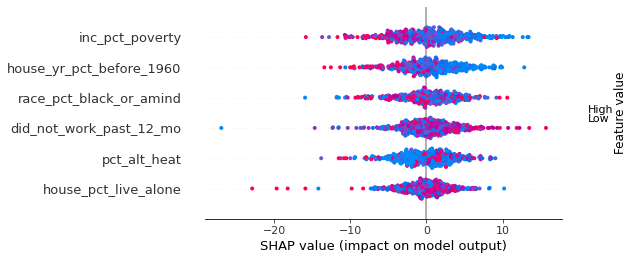

In [32]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl4_justACS).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

27533
2503
27533
2503
-----Training_Performance------
15.119289539870602
Test RMSE: 3.8883530626565537
Test MAE: 2.58222498656391


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


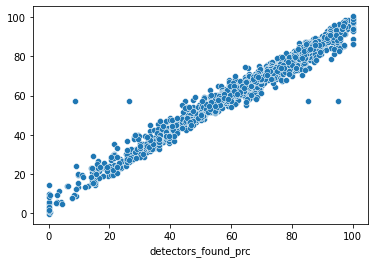

-----Test Performance ----- 
Test RMSE: 19.64869093526373
Test MAE: 14.578134017514135


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


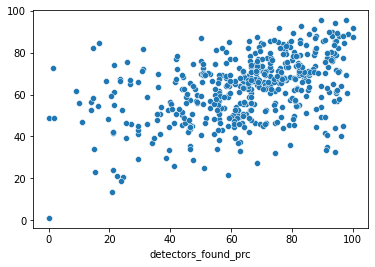

Test Correlation: (0.4455608709702078, 8.335892661041231e-26)
Test R-squared: 0.11365889956130071

 Feature ranking:
1. county_detectors_found_prc (0.253355)
2. house_yr_pct_before_1960 (0.100906)
3. race_pct_black_or_amind (0.097765)
4. state_detectors_found_prc (0.093646)
5. age_pct_over65 (0.087167)
6. house_val_less_50K (0.082561)
7. pct_alt_heat (0.073855)
8. house_pct_live_alone (0.073368)
9. inc_pct_poverty (0.072058)
10. did_not_work_past_12_mo (0.065320)
11. Population Density (per square mile), 2010 (0.000000)


In [34]:
mdl5,X_test,y_test =train_model(X = rd, y = sm , ACS = ACS_justSmokeCols  ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
All-NaN slice encountered


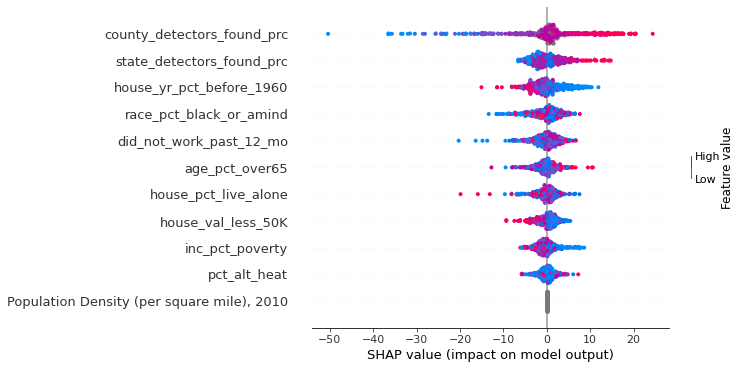

In [35]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl5).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

247248
2503
19968
2496
-----Training_Performance------
19.633267598721424
Test RMSE: 4.430944323586274
Test MAE: 3.164208229120843


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


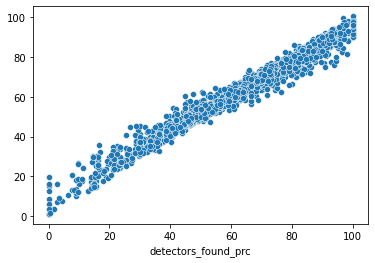

-----Test Performance ----- 
Test RMSE: 21.481157185800495
Test MAE: 16.612380489959715


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


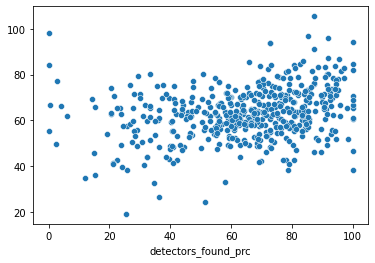

Test Correlation: (0.27495577039657804, 4.007274556204576e-10)
Test R-squared: 0.0037452991006309277

 Feature ranking:
1. age_pct_over65 (0.156321)
2. race_pct_black_or_amind (0.136163)
3. house_val_less_50K (0.134734)
4. pct_alt_heat (0.134430)
5. house_yr_pct_before_1960 (0.133847)
6. inc_pct_poverty (0.133391)
7. house_pct_live_alone (0.095869)
8. did_not_work_past_12_mo (0.075243)


In [36]:
mdl5_justACS,X_test,y_test = train_model_justACS(ACS = ACS_justSmokeCols, y = sm   ,modeltype= 'XGBoost')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


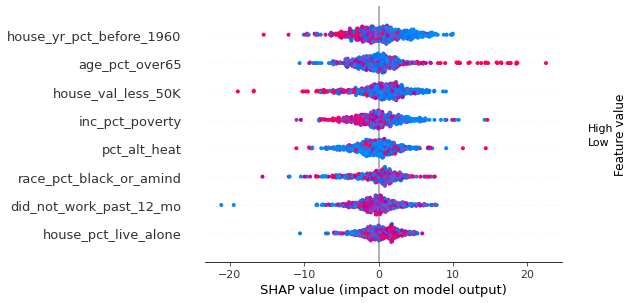

In [37]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
shap_values =shap.TreeExplainer(mdl5_justACS).shap_values(X_test)
shap.summary_plot(shap_values,X_test)
plt.show()

In [39]:
sm_all['rd_ACS_allCols'] =  mdl.predict(rd_all.merge(ACS,how = 'left', left_index = True, right_index = True) )
ACS_cols = ACS.columns
sm_all['ACS_allCols'] =  mdl_justACS.predict(rd_all.merge(ACS,how = 'left', left_index = True, right_index = True)[ACS_cols] )
sm_all['rd_ACS_reduced'] =  mdl2.predict(rd_all.merge(ACS_reduced,how = 'left', left_index = True, right_index = True) )

reduced_cols = ['heat_pct_coal','heat_pct_solar','house_yr_pct_before_1960','educ_less_12th','heat_pct_wood',
                  'inc_pct_poverty','age_pct_over65','race_pct_nonwhite','house_val_100K_300K','educ_no_school',
                  'house_pct_ownd_occupied','heat_pct_utility_gas','house_w_home_equity_loan','house_val_less_50K',
                  'educ_high_school','house_pct_family','heat_pct_other','house_pct_family_female_hh']
sm_all['ACS_reduced'] =  mdl2_justACS.predict(rd_all.merge(ACS_reduced,how = 'left', left_index = True, right_index = True)[reduced_cols] )
sm_all['No_ACS_Predictions'] =  mdl3.predict(rd_all )
sm_all['rd_ACS_commonCols'] =  mdl4.predict(rd_all.merge(ACS_commonCols,how = 'left', left_index = True, right_index = True) )
sm_all['ACS_commonCols'] =  mdl4_justACS.predict(rd_all.merge(ACS_commonCols,how = 'left', left_index = True, right_index = True)[ACS_cols_to_use] )
sm_all['rd_ACS_colsForSmoke'] =  mdl5.predict(rd_all.merge(ACS_justSmokeCols,how = 'left', left_index = True, right_index = True) )
sm_all['ACS_colsForSmoke'] =  mdl5_justACS.predict(rd_all.merge(ACS_justSmokeCols,how = 'left', left_index = True, right_index = True)[ACS_justSmoke_Cols] )

#sm_all['Avg_Predictions']  = (sm_all['No_ACS_Predictions'] +sm_all['ACS_commonCols_Predictions']) /2 

In [40]:
sm_all.loc[:,['num_surveys','geography',
              'detectors_found_prc',
              'detectors_working_prc',
              'rd_ACS_allCols','ACS_allCols','ACS_reduced','No_ACS_Predictions','rd_ACS_commonCols','ACS_commonCols','rd_ACS_colsForSmoke','ACS_colsForSmoke'    ] ]
sm_all = sm_all.merge(rd_all['Population Density (per square mile), 2010'],how = 'left',left_index = True,right_index = True)
sm_all.index =  '#_' + sm_all.index 

In [41]:
sm_all.to_csv(path / 'Data' / 'Model Outputs' / 'SmokeAlarmPredictiveModel_SouthAtlantic_ACS.csv')

In [78]:
sm_all.columns

Index(['num_surveys', 'detectors_found_total', 'detectors_found_prc',
       'detectors_found_CI', 'detectors_working_total',
       'detectors_working_prc', 'detectors_working_CI', 'geography', 'tract',
       'Full_Predictions', 'ACS_commonCols_Predictions', 'No_ACS_Predictions',
       'Avg_Predictions', 'Population Density (per square mile), 2010'],
      dtype='object')

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='No_ACS_Predictions'>

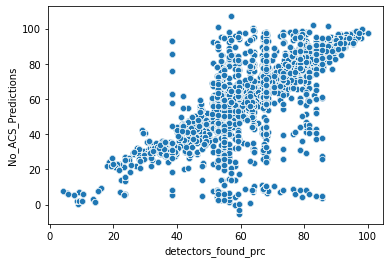

In [79]:
sns.scatterplot(sm_all['detectors_found_prc'],sm_all['No_ACS_Predictions'])

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='ACS_commonCols_Predictions'>

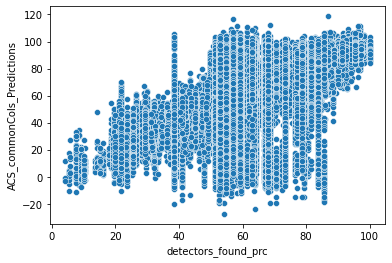

In [80]:
sns.scatterplot(sm_all['detectors_found_prc'],sm_all['ACS_commonCols_Predictions'])

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='Full_Predictions'>

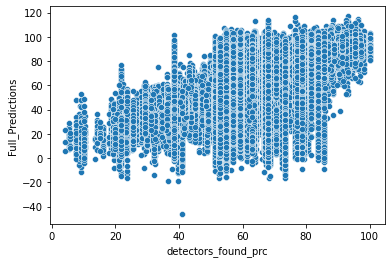

In [81]:
sns.scatterplot(sm_all['detectors_found_prc'],sm_all['Full_Predictions'])


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='Avg_Predictions'>

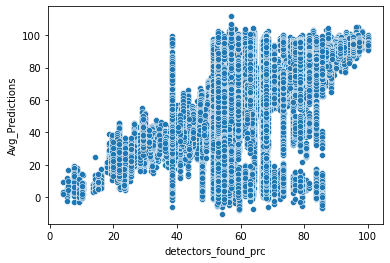

In [83]:
sns.scatterplot(sm_all['detectors_found_prc'],sm_all['Avg_Predictions'])


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='No_ACS_Predictions'>

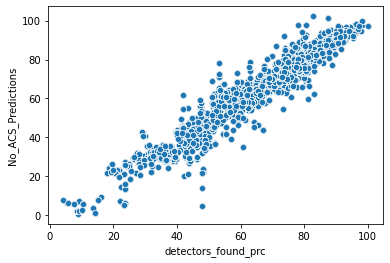

In [84]:
# plot of county predictions
sns.scatterplot(sm_all['detectors_found_prc'].where(sm_all['geography'] == 'county') ,sm_all['No_ACS_Predictions'].where(sm_all['geography'] == 'county' ) )


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='detectors_found_prc', ylabel='Avg_Predictions'>

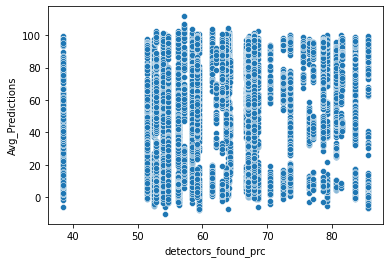

In [85]:
# plot of county predictions
sns.scatterplot(sm_all['detectors_found_prc'].where(sm_all['geography'] == 'state') ,sm_all['Avg_Predictions'].where(sm_all['geography'] == 'state' ) )